<a href="https://colab.research.google.com/github/YS-314/Numerical/blob/main/Time_series_forecasting_with_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

To run locally, copy and paste the code below into command prompt

```
jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com'  --port=8888  --NotebookApp.port_retries=0 

```  


Basic neural network stuff  
https://www.jeremyjordan.me/intro-to-neural-networks/  
https://www.jeremyjordan.me/neural-networks-training/  
Multivariate chain rule: Let $w = f(x_1,x_2...x_m)$ be a function of $m$ independent variables and for $i \in \{1,...,m\}$, $x_i = g(t_1, t_2 ,...,t_n)$ where $g$ is a function of $n$ independent variables. Then,
$$\frac{\partial w}{\partial t_j} = \frac{\partial w}{\partial x_1}\frac{\partial x_1}{\partial t_j}+\frac{\partial w}{\partial x_2}\frac{\partial x_2}{\partial t_j}...\frac{\partial w}{\partial x_m}\frac{\partial x_m}{\partial t_j}
\\ = \sum_{k=1}^{m}\frac{\partial w}{\partial x_k}\frac{\partial x_k}{\partial t_j}$$  
Since in a neural network, every neuron contains separate variables,  
Backpropagation  
http://neuralnetworksanddeeplearning.com/chap2.html
$$L(a,Y)=\sum_{n}^{}l(a_{n},Y_n)
\\\nabla_aL = \frac{\partial}{\partial a}l(a,Y)$$

For time series data, we use recurrent neural networks due to their ability to process variable lengths of data, meaning that we use the model reccurently to predict future events. In addition, convolutional neural networks can use convolution on the data, which can be seen as estimating derivatives of the data which can help in forecasting.

###Covolutional neural networks (CNN)

####Variations of recurrent neural networks
#####Fully recurrent neural networks (FRNN)
<!---(![](https://www.researchgate.net/publication/351930389/figure/fig1/AS:1028352785801216@1622189818173/Example-of-a-fully-connected-recurrent-neural-network-using-m-inputs-and-r-processing.png))-->
![](https://www.researchgate.net/profile/Branko-Ster/publication/225130168/figure/fig1/AS:393832194691078@1470908320889/A-fully-connected-recurrent-neural-network.png)<figcaption>Diagram for fully (connected) RNN</figcaption>  
It connects all the outputs of each neuron to the input of each neuron.  
<!---$$Y^{(t)}=F(x,Y^{(t)},\theta_1)
\\O^{(t)} = g(Y, \theta_2)
\\ $$ Maybe it is not implicit, but rather is just the input being connected to all neurons in the next timestep 😮 -->
Let $N$ be the number of neurons in the cell  
Let $\theta_1$ and $\theta_2$ be a list of parameters, which are in the form of numpy arrays, and can be vectors or matrices.   
$$\forall m \in N 
\\ h^{(m,t)} = f(h^{(N,t-1)}, x^{(t)}, \theta_1) \quad  
\\ o^{(t)} = g(h^{(N,t)}, \theta_2) \quad  $$  
$$h^{(t)} = f(h^{(t-1)}, x^{(t)}, \theta_1)
\\ o^{(t)} = g(h^{(t)}, \theta_2)$$
#####Long Short-Term Memory (LSTM) neural networks
$$f_t = \sigma_g(W_{f} x_t + U_{f} h_{t-1} + b_f) \\
i_t = \sigma_g(W_{i} x_t + U_{i} h_{t-1} + b_i) \\
o_t = \sigma_g(W_{o} x_t + U_{o} h_{t-1} + b_o) \\
\tilde{c}_t = \sigma_c(W_{c} x_t + U_{c} h_{t-1} + b_c) \\
c_t = f_t \odot c_{t-1} + i_t \odot \tilde{c}_t \\
h_t = o_t \odot \sigma_h(c_t)$$
##Neural controlled differential equations
[Neural Controlled Differential Equations for
Irregular Time Series](https://arxiv.org/abs/2005.08926)<br><br>
[Neural Rough Differential Equations for Long Time Series
](http://proceedings.mlr.press/v139/morrill21b/morrill21b.pdf)<br>
[Supplementary paper](http://proceedings.mlr.press/v139/morrill21b/morrill21b-supp.pdf)
###The predecessor - Neural ODEs
[Neural ODEs paper](https://arxiv.org/pdf/1806.07366.pdf)  
Neural ODEs are a continuous analogue of residual neural network (ResNet). ResNets are defined by the following equations  
$$h^{(i)} = f(W^{(i)}h^{(i-1)}+b^{(i)})+h^{(i-1)}
$$
or alternatively
$$h^{(i)} = f(h^{(i-1)},\theta)+h^{(i-1)}
$$
and
$$
\\o = W^{(n)}h^{(n)}+b^{(n)}
$$
where $n$ is the number of hidden layers chosen.  
It can be seen that RNN neurons generalises that of a ResNet. <br>  
The form of this equation resembles that of euler's method in approximating the solution of an ordinary differential equation (ODE). By taking the limit as the number of layers approach infinity while the change in i, $\Delta i$, decreases to $0$, we parametise the layer to:
$$\frac{d}{dt}h(t)=f(h(t), t, \theta)$$   
The error is:
$$E = L(y, z(t_1)) = L(y, z(t_\theta) + \int_{t_0}^{t_1}f(z(t),t,\theta)dt=L(\text{ODESolve}(z(t_0),f,t_\theta,t_1,\theta)$$
For backpropagation, we  
####Latent Neural ODEs
[Latent ODEs for Irregularly-Sampled Time Series](https://arxiv.org/abs/1907.03907)  
###The mathematics
Similar to neural ODEs, Neural CDEs are a continuous analogue to recurrent neural networks (instead of residual)  
[Code from NeuralCDE paper](https://github.com/patrick-kidger/NeuralCDE)
Chain 
$$y=C(f(W_1g(W_2x+c_2)+c_1))
\\ \frac{\partial y}{\partial W_1} = C'(f(W_1g(W_2x+c_2)+c_1))f'(W_1g(W_2x+c_2)+c_1)g(W_2x+c_2)
\\ \frac{\partial y}{\partial c_1} = C'(f(W_1g(W_2x+c_2)+c_1))f'(W_1g(W_2x+c_2)+c_1)g(W_2x+c_2) $$  
Or alternatively  
$$y = C(f(g(X,\theta_2),\theta_1))
\\ \frac{\partial y}{\partial \theta_1} = C'(f(g(X,\theta_2),\theta_1))\frac{\partial}{\partial \theta_1}f(g(X,\theta_2),\theta_1)
\\ f(g(X,\theta_2),\theta_1) = W_1g(X,\theta_2)+c_1
\\ \frac{\partial y}{\partial W_1} = C'(W_1g(X,\theta_2)+c_1)\frac{\partial}{\partial W_1}f(W_1g(X,\theta_2)+c_1) = C'(W_1g(X,\theta_2)+c_1)f'(W_1g(X,\theta_2)+c_1)W_1g(X,\theta_2)
$$  
Multiplication with the weight matrices means matrix multiplication?

Code for calculating expression for backpropogation in a neural network with an arbitrary structure 

In [ ]:
!pip install sympy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sympy as sym

In [ ]:
def 

In [ ]:
def basic_gd(X,grad,gamma):
  return X - gamma*grad

In [ ]:
def L(y,yp):
  return (y-yp)**2

In [ ]:
def vectorise(X):
  if len(X.shape) == 1:
    return np.array([[x]for x in X])
  else:
   return X

In [ ]:
vectorise(np.array([1,2,3,45]))

array([[ 1],
       [ 2],
       [ 3],
       [45]])

### Recurrent neural networks (RNN)
![https://en.wikipedia.org/wiki/File:Recurrent_neural_network_unfold.svg](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Recurrent_neural_network_unfold.svg/2560px-Recurrent_neural_network_unfold.svg.png)
  
<sub>a simple RNN</sub>  
where $x_t$ is the input vector at time $t$, $h(t)$ is the hidden state of the network at time $t$ and $o_t$ is the output at the particular time.<br><br>
Mathematically, a basic recurrent neural network can be defined as follows:
$$h^{(t)} = f(Vh^{(t-1)}+Ux^{(t)}+b)
\\o^{(t)}=Wh^{(t)}+c$$
Where $h^{(t)}, V, $ are matrices?  
**Note: U, V, W, b and c are all equal across the entire network.** This is in contrast with feedforward neural networks, which every weight and bias is different.  
If we replace the parameters with $\theta$, we obtain:  
$$h^{(t)} = f(h^{(t-1)}, x^{(t)}, \theta_1)
\\ o^{(t)} = g(h^{(t)}, \theta_2)
$$  
Backpropagation of RNN:  
The error of the  
Deep RNN:  
![DRNN structure](https://stanford.edu/~shervine/teaching/cs-230/illustrations/deep-rnn-ltr.png?f57da6de44ddd4709ad3b696cac6a912)  
<sub>From https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks</sub>  
($a$ is substituted with $h$ )
$$h^{(0,t)} = f(V^{(0)}h^{(0,t-1)}+U^{(0)}x^{(t)}+b^{(0)})
\\h^{(k,t)} = f(V^{(k)}h^{(k,t-1)}+U^{(k)}h^{(k-1,t)}+b^{(k)})
\\o^{(t)}=Wh^{(n,t)}+c$$  
In other words, $h^{(-1,t)}$ is $x^{(t)}$  
####Backpropagation:  
At layer 0 at time t,
$$h^{(0,t)}=f(f(...f(f(h^{(0,-1)},x^{(0)},\theta^{(0)}),x^{(1)},\theta^{(0)})...,x^{(t-1)},\theta^{(0)}),x^{(t)},\theta^{(0)})$$
$f$ is $f^{(0)}$  
and at layer k at time 0,
$$h^{(k,0)} = f()$$  
at layer k at time t,  
$$$$ 
We first consider replacing the deep RNN with $f(X^{(t)},h^{(k,t)},)$
If we use the weighted input of the matrices, where
$$z^{(k,t)} = V^{(k)}h^{(k,t-1)}+U^{(k)}h^{(k-1,t)}+b^{(k)}
\\h^{(k,t)} = f^{(k)}(z^{(k,t)})$$
,we get
$$
h^{(0,k)} = f(z^{(0,k)})$$
 $$
z^{(0,t)} = V^{(0)}h^{(0,t-1)}+U^{(0)}x^{(t)}+b^{(0)}
\\z^{(k,t)} = V^{(k)}f^{(k)}(z^{(k,t-1)})+U^{(k)}f^{(k-1)}(z^{(k-1,t)})+b^{(k)}
\\ o^{(t)}=Wf^{(k)}(z^{(k,t)})+c
$$






In [ ]:

'''
cstruct determines the dimensions of the output vector of each cell.

Irregular timestep?
'''
class basicdeepRNN:
  def __init__(bRNN, X, Y, af, afp, struct):
    bRNN.X = X
    bRNN.Y = Y
    test = X[0]
    testtype = type(test)
    if testtype == np.ndarray:
      bRNN.xdim = len(test)
    else:
      bRNN.X = vectorise(X)
      bRNN.oxdim = 0
      bRNN.xdim = 1
    test = Y[0]
    testtype = type(test)
    if testtype == np.ndarray:
      bRNN.ydim = len(test)
    else:
      bRNN.Y = vectorise(Y)
      bRNN.oydim = 0
      bRNN.ydim = 1
          

    bRNN.af = af
    bRNN.struct = struct
    bRNN.hparams = [0]*3
    bRNN.oparams = [0]*2
    nlayer = len(bRNN.struct)
    bRNN.h0 = [0]*nlayer
    for x in range(nlayer):
      bRNN.h0[x] = np.zeros((bRNN.struct[x]))
    bRNN.nlayer = nlayer
    bRNN.hn = np.array([])
    '''if bRNN.xdim == 0:
      bRNN.timestep = min(np.diff(X))
    else:
      bRNN.timestep = [min([max(X[n+1][k]-X[n][k],1) for n in range(len(X)-1)]) for k in range(len(X[0]))] # np.diff is wrong if X=[x1,x2,x3,x4] where xn are vectors.
    '''
    
    bRNN.hparams[0] = [0]*nlayer
    for k in range(nlayer):
      bRNN.hparams[0][k] = np.random.rand(bRNN.struct[k],bRNN.struct[k])
    bRNN.hparams[1] = [0]*nlayer
    bRNN.hparams[1][0] = np.random.rand(*(bRNN.xdim,bRNN.struct[0]))
    for k in range(1,nlayer):
      bRNN.hparams[1][k] = np.random.rand(*(bRNN.struct[k-1],bRNN.struct[k]))
    bRNN.hparams[2] = [0]*nlayer
    for k in range(nlayer):
      bRNN.hparams[2][k] = np.random.rand(struct[k])
    bRNN.oparams[0] = np.random.rand(*(bRNN.struct[nlayer-1],bRNN.ydim))
    bRNN.oparams[1] = np.random.rand(bRNN.ydim)




  '''def init(bRNN):
    b = 0'''

  def fpass(bRNN,X,hn = False):
    if bRNN.oxdim == 0:
      X = vectorise(X)
    Ht = np.copy(bRNN.h0)
    Y = np.zeros([x for x in (len(X),bRNN.ydim) if x>0])
    t = 0
    for t,x in enumerate(X):
      Ht[0] = bRNN.af(np.matmul(Ht[0],bRNN.hparams[0][0])+np.matmul(x,bRNN.hparams[1][0])+bRNN.hparams[2][0])
      for k in range(1,bRNN.nlayer):
        Ht[k] = bRNN.af(np.matmul(Ht[k],bRNN.hparams[0][k])+np.matmul(Ht[k-1],bRNN.hparams[1][k])+bRNN.hparams[2][k])
      Y[t] = np.matmul(Ht[-1],bRNN.oparams[0])+bRNN.oparams[1]

    if hn == True:
      return (Y,Ht)
    else:
      return Y

  def fpassh(bRNN,X,h0,hn = False):
    if bRNN.oxdim == 0:
      X = vectorise(X)
    Ht = h0
    Y = np.zeros([x for x in (len(X),bRNN.ydim) if x>0])
    for t,x in enumerate(X):
      Ht[0] = bRNN.af(np.matmul(Ht[0],bRNN.hparams[0][0])+np.matmul(x,bRNN.hparams[1][0])+bRNN.hparams[2][0])
      for k in range(1,bRNN.nlayer):
        Ht[k] = bRNN.af(np.matmul(Ht[k],bRNN.hparams[0][k])+np.matmul(Ht[k-1],bRNN.hparams[1][k])+bRNN.hparams[2][k])
      Y[t] = np.matmul(Ht[-1],bRNN.oparams[0])+bRNN.oparams[1]

    if hn == True:
      return (Y,Ht)
    else:
      return Y
  def pred(bRNN,Xp):
    if np.array_equal(bRNN.hn,np.array([])):
      bRNN.hn = bRNN.fpass(bRNN.X,True)[1]
    return bRNN.fpassh(Xp,bRNN.hn)
    
  def fpassz(bRNN,X):
    if bRNN.oxdim == 0:
      X = vectorise(X)
    zl = bRNN.af(np.copy(bRNN.h0))
    for t,x in enumerate(X):
      #forward pass in data
      #ensure that Ht is replaced with weighted
      zl[0] = np.matmul(zl[0],bRNN.hparams[0][0])+np.matmul(x,bRNN.hparams[1][0])+bRNN.hparams[2][0] #change this section to include zl previous timestep and 
      for k in range(1,bRNN.nlayer):
        zl[k] = np.matmul(bRNN.af(zl[k]),bRNN.hparams[0][k])+np.matmul(bRNN.af(zl[k-1]),bRNN.hparams[1][k])+bRNN.hparams[2][k]
      Y[t] = np.matmul(bRNN.af(zl[-1]),bRNN.oparams[0])+bRNN.oparams[1]
      return(Y)

'''
  def epoch(bRNN,L,Lp):
    zl = np.copy(bRNN.h0)
    for t,x in enumerate(X):
      #forward pass in data
      #ensure that Ht is replaced with weighted
      zl[0] = np.matmul(zl[0],bRNN.hparams[0][0])+np.matmul(x,bRNN.hparams[1][0])+bRNN.hparams[2][0] #change this section to include zl previous timestep and 
      for k in range(1,bRNN.nlayer):
        zl[k] = np.matmul(bRNN.af(zl[k]),bRNN.hparams[0][k])+np.matmul(bRNN.af(zl[k-1]),bRNN.hparams[1][k])+bRNN.hparams[2][k]
      Y = np.matmul(bRNN.af(zl[-1]),bRNN.oparams[0])+bRNN.oparams[1]
      #error
      loss = np.sum(L(bRNN.Y[t],Y))
      #Backpropagation + calculate derivatives
      deltaL = Lp(Y,bRNN.Y)*bRNN.afp(Y)
      for k in range(bRNN.nlayer,0,-1):
        
        deltaL = np.matmul(np.transpose(bRNN.h0[1][k]))* # finish
'''



      

 



'\n  def epoch(bRNN,L,Lp):\n    zl = np.copy(bRNN.h0)\n    for t,x in enumerate(X):\n      #forward pass in data\n      #ensure that Ht is replaced with weighted\n      zl[0] = np.matmul(zl[0],bRNN.hparams[0][0])+np.matmul(x,bRNN.hparams[1][0])+bRNN.hparams[2][0] #change this section to include zl previous timestep and \n      for k in range(1,bRNN.nlayer):\n        zl[k] = np.matmul(bRNN.af(zl[k]),bRNN.hparams[0][k])+np.matmul(bRNN.af(zl[k-1]),bRNN.hparams[1][k])+bRNN.hparams[2][k]\n      Y = np.matmul(bRNN.af(zl[-1]),bRNN.oparams[0])+bRNN.oparams[1]\n      #error\n      loss = np.sum(L(bRNN.Y[t],Y))\n      #Backpropagation + calculate derivatives\n      deltaL = Lp(Y,bRNN.Y)*bRNN.afp(Y)\n      for k in range(bRNN.nlayer,0,-1):\n        \n        deltaL = np.matmul(np.transpose(bRNN.h0[1][k]))* # finish\n'

C:\Users\hooim\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:959: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


<function matplotlib.pyplot.show(close=None, block=None)>

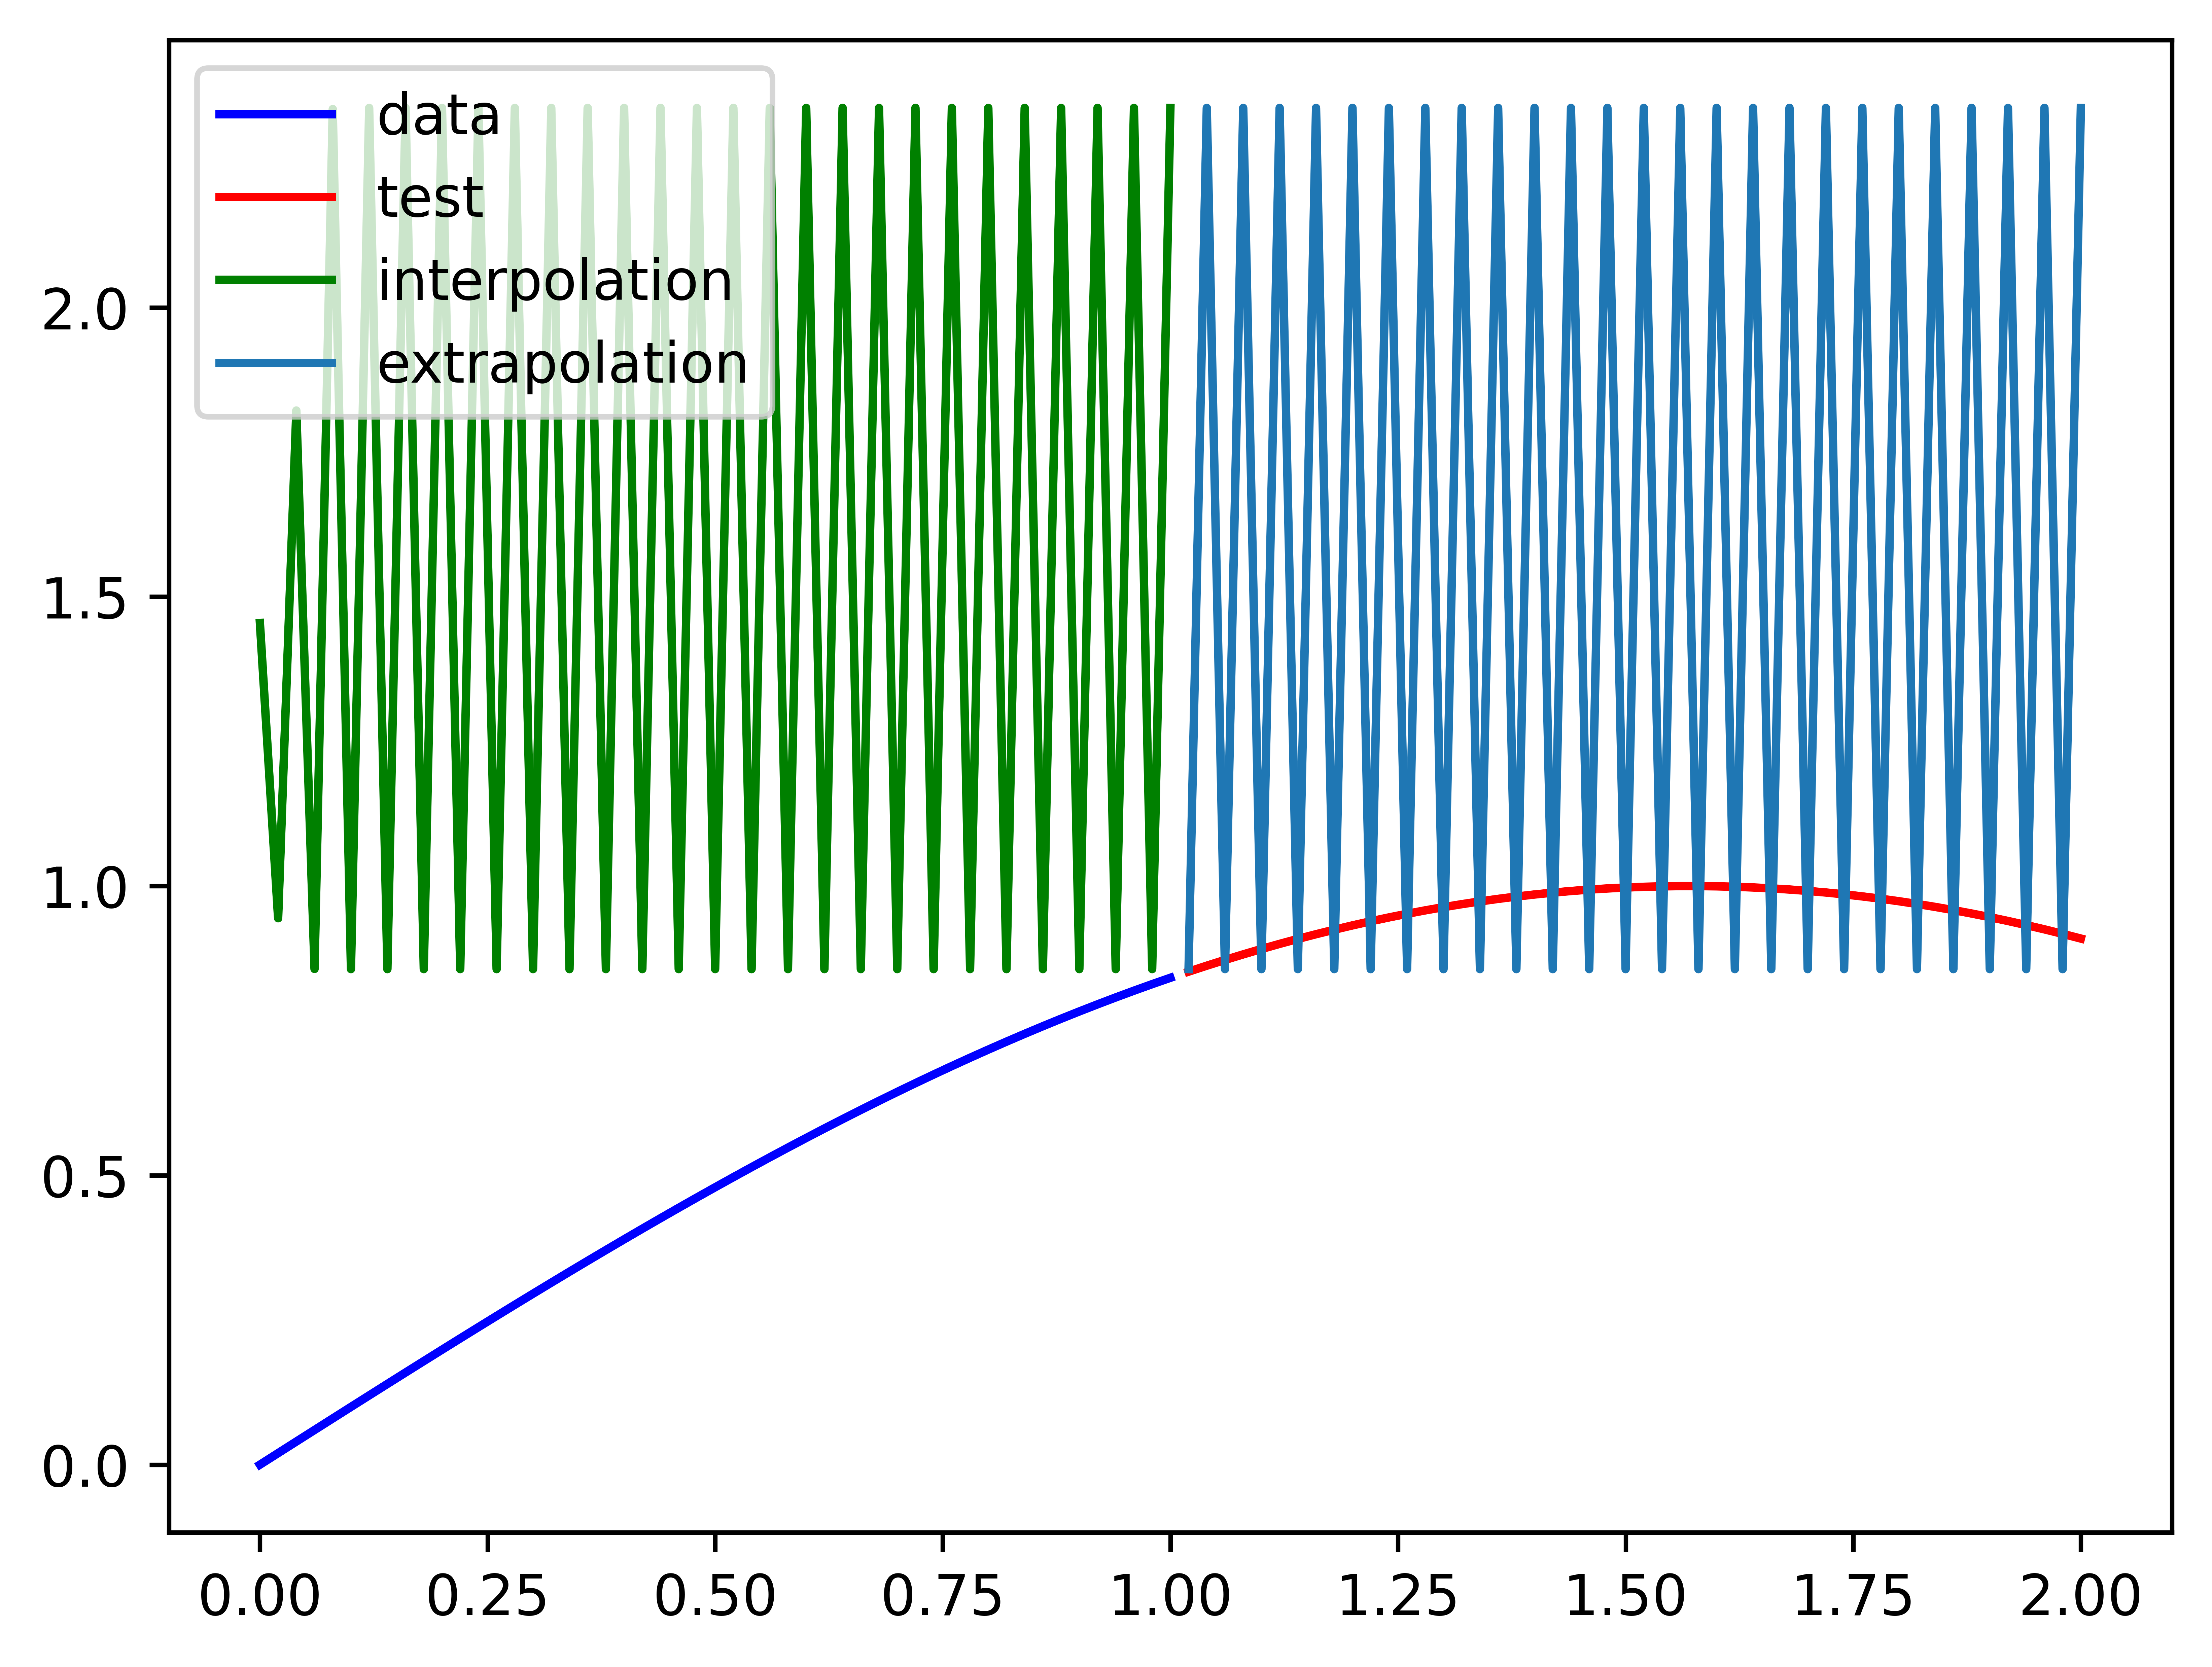

In [ ]:
#basic recurrent RBF network https://en.wikipedia.org/wiki/Radial_basis_function_network#
X = np.linspace(0,1,51)
Y = np.sin(X)
testX = np.linspace(1.02,2,50)
testY = np.sin(testX)
struct = [5]*50
struct[0] = 2
struct[25] = 10
tdRNN = basicdeepRNN(X,Y,(lambda x: np.e**(-x**2)), (lambda x: -2*x*np.e**(-x**2)), struct)
Yi = tdRNN.fpass(X)
#Yp = tdRNN.fpass
plt.figure(dpi = 1200)
plt.plot(X,Y,"-b", label ="data")
plt.plot(testX,testY,"-r", label ="test")
plt.plot(X,Yi,"-g", label = "interpolation")
plt.plot(testX,tdRNN.pred(testX), label = "extrapolation")
plt.legend(loc="upper left")
plt.show
#print(tdRNN.hparams)

In [ ]:
#training neural network


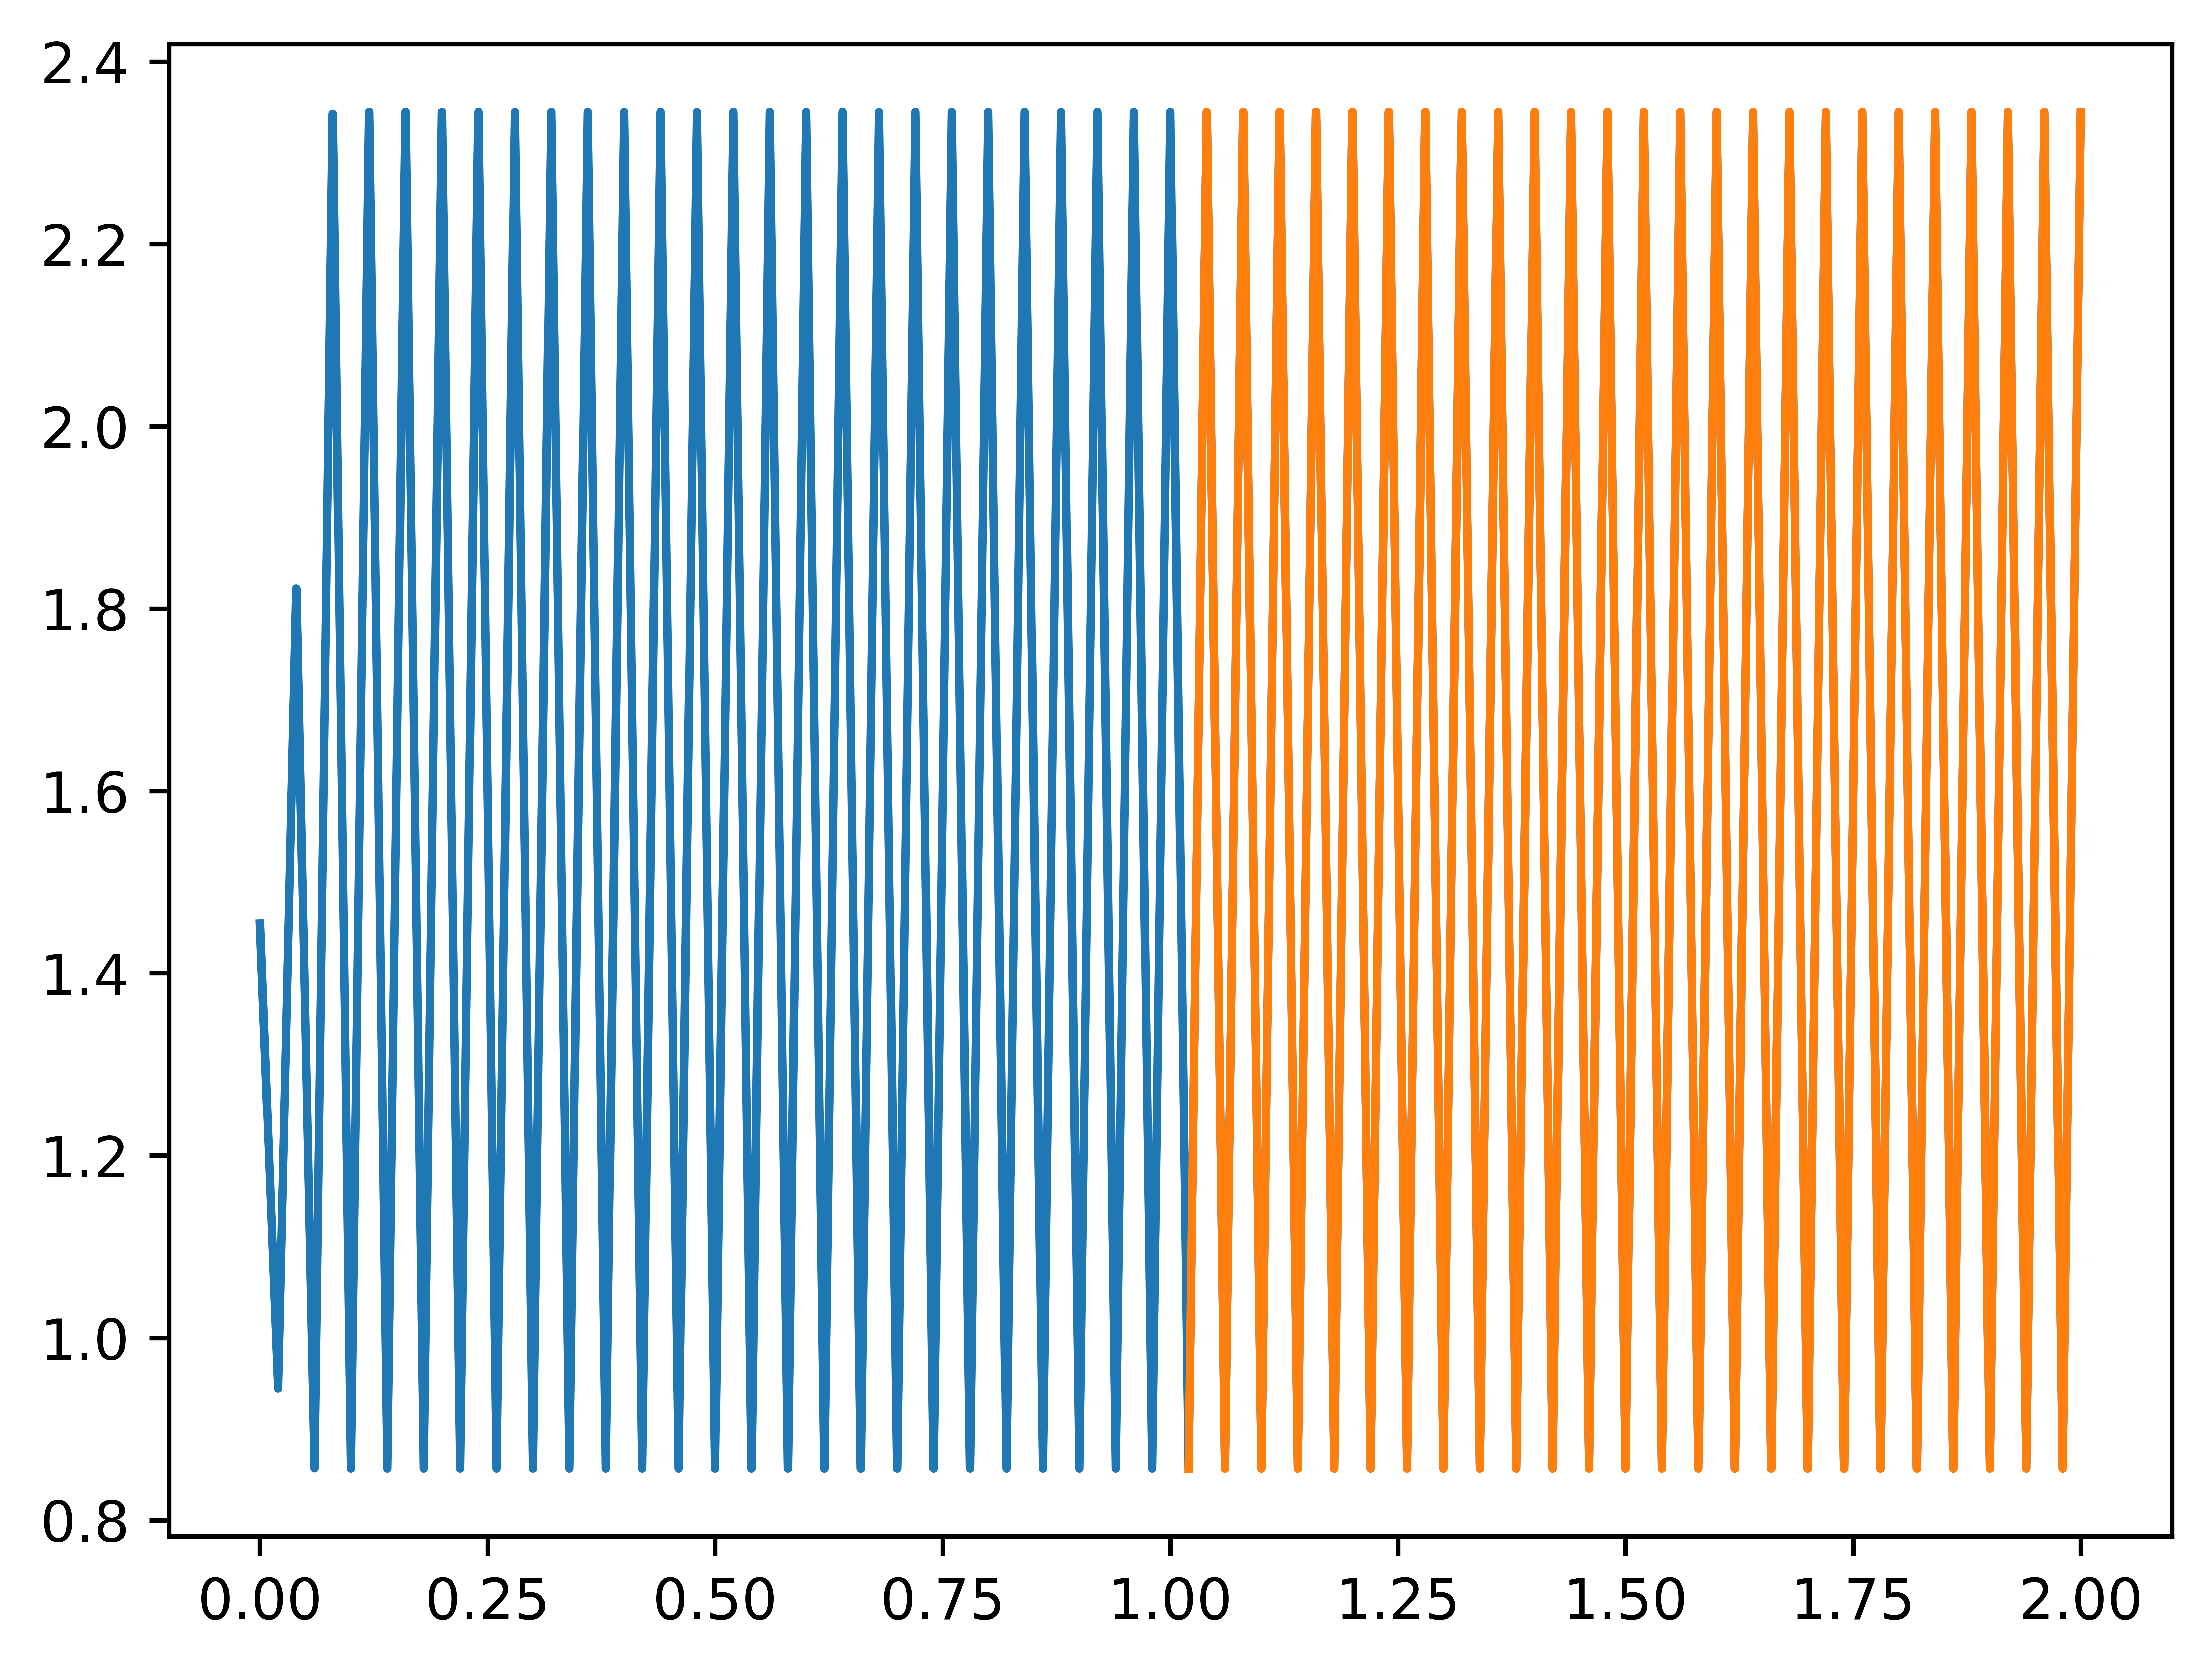

In [ ]:
plt.figure(dpi = 1200)
plt.plot(np.concatenate((X,testX)),tdRNN.fpass(np.concatenate((X,testX))))
#plt.plot(X,tdRNN.fpass(X),"-g", label = "interpolation")
plt.plot(testX,tdRNN.pred(testX))


In [ ]:
np.concatenate((X,testX))

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 1.02, 1.04, 1.06, 1.08,
       1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 , 1.22, 1.24, 1.26, 1.28, 1.3 ,
       1.32, 1.34, 1.36, 1.38, 1.4 , 1.42, 1.44, 1.46, 1.48, 1.5 , 1.52,
       1.54, 1.56, 1.58, 1.6 , 1.62, 1.64, 1.66, 1.68, 1.7 , 1.72, 1.74,
       1.76, 1.78, 1.8 , 1.82, 1.84, 1.86, 1.88, 1.9 , 1.92, 1.94, 1.96,
       1.98, 2.  ])

In [ ]:
print(X[-1])
print(testX[0])

1.0
1.01


In [ ]:
tdRNN.pred(testX)

In [ ]:
tdRNN.fpass(np.concatenate((X,testX)))

In [ ]:
np.concatenate((X,testX))

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99])

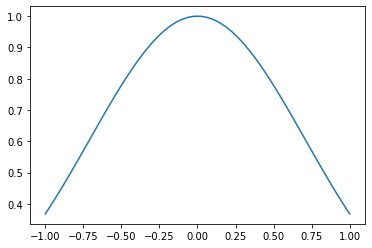

In [ ]:
plt.plot(2*X-1,np.e**(-(2*X-1)**2))

In [ ]:
tdRNN.fpassh(np.array([4,5]),tdRNN.fpass(np.array([1,2,3]),True)[1],True)

In [ ]:
tdRNN.fpass(np.array([1,2,3,4,5]),True)

(array([[0.19281503],
        [0.85380776],
        [0.12110272],
        [1.47691206],
        [0.11983406]]), array([array([7.11584542e-05, 2.77416943e-05]),
        array([0.25796312, 0.52199906, 0.72060183, 0.39637696, 0.54284603]),
        array([4.99058534e-06, 3.09900756e-04, 7.55167508e-03, 2.34665931e-02,
               1.41727112e-03])                                               ,
        array([0.71933648, 0.7431847 , 0.37413052, 0.60919777, 0.89406605]),
        array([3.19858541e-07, 4.50049377e-03, 8.65466149e-09, 1.68068426e-08,
               2.29800602e-10])                                               ,
        array([0.76193162, 0.85344099, 0.73828497, 0.77363866, 0.87161886]),
        array([4.97268428e-10, 1.49209421e-08, 4.37128508e-11, 2.27281606e-05,
               2.15852714e-13])                                               ,
        array([0.59722197, 0.90270357, 0.93016207, 0.41578791, 0.41423214]),
        array([4.74112157e-10, 5.98160654e-05, 2.994048

In [ ]:
tdRNN.fpassz(np.array([1,2,3,4,5]))

array([0.2100394 , 0.01999867, 0.03998933, 0.05996401, 0.07991469,
       0.09983342, 0.11971221, 0.13954311, 0.15931821, 0.17902957,
       0.19866933, 0.21822962, 0.23770263, 0.25708055, 0.27635565,
       0.29552021, 0.31456656, 0.33348709, 0.35227423, 0.37092047,
       0.38941834, 0.40776045, 0.42593947, 0.44394811, 0.46177918,
       0.47942554, 0.49688014, 0.51413599, 0.5311862 , 0.54802394,
       0.56464247, 0.58103516, 0.59719544, 0.61311685, 0.62879302,
       0.64421769, 0.65938467, 0.67428791, 0.68892145, 0.70327942,
       0.71735609, 0.73114583, 0.74464312, 0.75784256, 0.77073888,
       0.78332691, 0.79560162, 0.8075581 , 0.81919157, 0.83049737,
       0.84147098])

In [ ]:
Xs = np.linspace(0,3,2)
Ys = np.sin(X)
structs = [2,3]
sRNN = basicdeepRNN(Xs,Ys,(lambda x: np.e**(-x**2)), structs)
sRNN.fpass(np.array([[0]]))
#[print(x) for x in sRNN.hparams]


array([[0.58765576]])

In [ ]:
'''
print(vectorise(Xs))
print(sRNN.hparams[0][0])
print(sRNN.h0[0])
print(np.matmul(sRNN.h0[0],sRNN.hparams[0][0]))
print(sRNN.hparams[1][0])
print(vectorise(Xs)[0])
print(np.matmul(vectorise(Xs)[0],sRNN.hparams[1][0]))'''
#print(np.matmul(vectorise(Xs)[0],sRNN.hparams[1][0])
#print(sRNN.af(np.matmul(sRNN.hparams[0][0],sRNN.h0[0])+np.matmul(sRNN.hparams[1][0],vectorise(Xs)[0])+sRNN.hparams[2][0]))


In [ ]:
A = sRNN.fpass(np.array([2]),True)
#print(A)
print(sRNN.fpassh(np.array([3]),A[1]))
print(sRNN.fpass(np.array([2,3])))

[[0.90218585]]
[[0.90218585]
 [0.        ]]


In [ ]:
Xs

array([0., 3.])

In [ ]:
sRNN.fpass(np.array([0,3,6]))

array([[0.73603602],
       [0.        ],
       [0.        ]])

In [ ]:
sRNN.fpass()

In [ ]:
sRNN.pred(np.array([3,6]))

C:\Users\hooim\AppData\Local\Temp\ipykernel_24168\2112233132.py:96: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if bRNN.hn == []:


array([[1.2070621],
       [0.       ]])

In [ ]:
print()

In [ ]:
'''
#print(sRNN.af(np.matmul(sRNN.hparams[0][0],sRNN.h0[0])+np.matmul(sRNN.hparams[1][0],vectorise(Xs)[0])+sRNN.hparams[2][0]))
#print(sRNN.fpass(Xs))
#sRNN.hparams
#print(sRNN.timestep)
'''

'\n#print(sRNN.af(np.matmul(sRNN.hparams[0][0],sRNN.h0[0])+np.matmul(sRNN.hparams[1][0],vectorise(Xs)[0])+sRNN.hparams[2][0]))\n#print(sRNN.fpass(Xs))\n#sRNN.hparams\n#print(sRNN.timestep)\n'

In [ ]:
np.matmul(np.random.rand(2,1),np.random.rand(1,2))

ValueError: ignored

In [ ]:
np.random.rand(*(sRNN.xdim,sRNN.struct[0]))

array([], shape=(0, 3), dtype=float64)

In [ ]:
A = [i for i in (0,1,3) if i>0]
np.random.rand(*A)

array([[0.11628318, 0.48643342, 0.89662169]])

In [ ]:
(sRNN.xdim,sRNN.struct[0])

(0, 3)

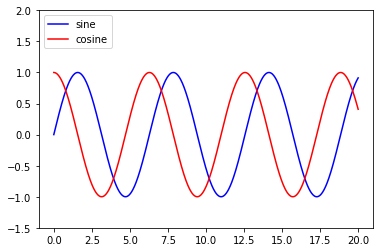

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 20, 1000)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1, "-b", label="sine")
plt.plot(x, y2, "-r", label="cosine")
plt.legend(loc="upper left")
plt.ylim(-1.5, 2.0)
plt.show()

#Recurrent neural network for multiple dimensions
Instead of having a scalar timestep (1D), let the timestep be a vector (>1D)  
With that, we will end up with a n-dimensional rectangle, with  
each cell being  
$f^{(k)}(h^{(k-1,t-1,...)},h^{(k,t_1-1,...)},h^{(k,t_1, t_2-1,...)},...h^{(k,t_1,...,t_n-1)},\theta^{(k)})$

In [ ]:
len(1.2345)

TypeError: ignored

In [ ]:
x= sym.symbols('x')
print(sym.diff(sym.sin(x)**2+sym.cos(x)**2,x))

0


In [ ]:
X, theta1, theta2 = sym.symbols("X, theta1, theta2")
C = sym.Function('C')
f = sym.Function('f')
g = sym.Function('g')
Y = C(f(g(X,theta2),theta1))
print(Y.diff(theta1))

Derivative(C(f(g(X, theta2), theta1)), f(g(X, theta2), theta1))*Derivative(f(g(X, theta2), theta1), theta1)


In [ ]:
by X,theta0,theta1,w1,w2 = sym.symbols("X,theta0,theta1,w1,w2")
fd = {}
fd['f1'] = sym.Function('f')
f, g = sym.Function('f,g')
F = f(theta0*g(theta1*X+w1)+w2)
print(sym.diff(F,theta0))



TypeError: ignored

In [ ]:
'''A = sym.MatrixSymbol('A',2,2)
f = sym.Function('f')
g = sym.Function('g')
sym.diff(f(g(A)))'''

"A = sym.MatrixSymbol('A',2,2)\nf = sym.Function('f')\ng = sym.Function('g')\nsym.diff(f(g(A)))"

Struct is list of tuple of form ```(n, range(a, b))```  
where a and b are range of layers with nth activation function


In [ ]:
class basic_ANN:
  def _init__(ANN,struct,X,Y,aF,params):
    ANN.X = X
    ANN.Y = Y
    ANN.aF = aF
    ANN.struct = struct
    ANN.nepoch = 0
    ANN.params

  def forward_pass(X):

Recurrent Neural Network  
Use sympy to calculate expression  
Params are in the form of [param1, param2, param3] where param(n) is a numpy array

In [ ]:
class RNN:
  def _init__(RNN,X,Y,af,params):
    RNN.X = X
    RNN.Y = Y
    RNN.af = af 
    RNN.nepoch = 0
    RNN.params = params

  def forward_pass(RNN,X):
    return f(X,*params)

  def struct(RNN,)


In [ ]:
'''import sympy
from sympy import symbols, Matrix, exp, log, diff, Function
x = symbols('x')  # input
y = symbols('y')  # output
w1, w2, w3, w4, w5, w6 = symbols('w1 w2 w3 w4 w5 w6')  # weights
b1, b2, b3 = symbols('b1 b2 b3')  # biases
sigmoid = Function('sigmoid')
z1 = w1 * x + b1
h1 = sigmoid(z1)
z2 = w2 * h1 + b2
h2 = sigmoid(z2)
z3 = w3 * h2 + w4 * x + b3
h3 = sigmoid(z3)
z4 = w5 * h3
h4 = sigmoid(z4)
y_hat = h4
y_true = symbols('y_true')
loss = (y_true - y_hat) ** 2 / 2
d_loss_d_w5 = diff(loss, w5)
d_loss_d_h3 = diff(loss, h3)
d_loss_d_z4 = diff(loss, z4)
d_loss_d_w4 = diff(loss, w4)
d_loss_d_x = diff(loss, x)
d_loss_d_w3 = diff(loss, w3)
d_loss_d_h2 = diff(loss, h2)
d_loss_d_z3 = diff(loss, z3)
d_loss_d_w2 = diff(loss, w2)
d_loss_d_h1 = diff(loss, h1)
d_loss_d_z2 = diff(loss, z2)
d_loss_d_w1 = diff(loss, w1)
d_loss_d_b3 = diff(loss, b3)
d_loss_d_b2 = diff(loss, b2)
d_loss_d_b1 = diff(loss, b1)
print(d_loss_d_w5)
print(d_loss_d_h3)
print(d_loss_d_z4)
print(d_loss_d_w4)
print(d_loss_d_x)
print(d_loss_d_w3)
print(d_loss_d_h2)
print(d_loss_d_z3)
print(d_loss_d_w2)
print(d_loss_d_h1)
print(d_loss_d_z2)
print(d_loss_d_w1)
print(d_loss_d_b3)
print(d_loss_d_b2)
print(d_loss_d_b1)'''

"import sympy\nfrom sympy import symbols, Matrix, exp, log, diff, Function\nx = symbols('x')  # input\ny = symbols('y')  # output\nw1, w2, w3, w4, w5, w6 = symbols('w1 w2 w3 w4 w5 w6')  # weights\nb1, b2, b3 = symbols('b1 b2 b3')  # biases\nsigmoid = Function('sigmoid')\nz1 = w1 * x + b1\nh1 = sigmoid(z1)\nz2 = w2 * h1 + b2\nh2 = sigmoid(z2)\nz3 = w3 * h2 + w4 * x + b3\nh3 = sigmoid(z3)\nz4 = w5 * h3\nh4 = sigmoid(z4)\ny_hat = h4\ny_true = symbols('y_true')\nloss = (y_true - y_hat) ** 2 / 2\nd_loss_d_w5 = diff(loss, w5)\nd_loss_d_h3 = diff(loss, h3)\nd_loss_d_z4 = diff(loss, z4)\nd_loss_d_w4 = diff(loss, w4)\nd_loss_d_x = diff(loss, x)\nd_loss_d_w3 = diff(loss, w3)\nd_loss_d_h2 = diff(loss, h2)\nd_loss_d_z3 = diff(loss, z3)\nd_loss_d_w2 = diff(loss, w2)\nd_loss_d_h1 = diff(loss, h1)\nd_loss_d_z2 = diff(loss, z2)\nd_loss_d_w1 = diff(loss, w1)\nd_loss_d_b3 = diff(loss, b3)\nd_loss_d_b2 = diff(loss, b2)\nd_loss_d_b1 = diff(loss, b1)\nprint(d_loss_d_w5)\nprint(d_loss_d_h3)\nprint(d_loss_d_

In [ ]:
[[1,2],[3,4]][1][1]

4

In [ ]:
A = [0]*3
A[1] = 1

In [ ]:
[print(v) for v in range(1,5)]

1
2
3
4


[None, None, None, None]

In [ ]:
None

In [ ]:
np.zeros((2,12))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
np.array(range(0,100,1))*0.01

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [ ]:
X = np.array([1,2])
Y = np.array([[1,2,3,4],[1,2,3,4]])
np.matmul(X,Y)

array([ 3,  6,  9, 12])

In [ ]:
np.random.rand(*(2,2))

array([[0.74163264, 0.38391837],
       [0.12666003, 0.51319851]])

In [ ]:
np.diff(np.array([[1,2,4,6],[3,4,6,8]]))

array([[1, 2, 2],
       [1, 2, 2]])

In [ ]:
print(type(np.array([[1,2],[3,4]])[1][1]) == np.ndarray)
print(type(np.array([[1,2],[3,4]])[1]) == np.ndarray)

False
True


In [ ]:
np.diff(np.array([2,4,7]))

array([2, 3])

In [ ]:
X = np.array([[1,2,7],[3,4,10],[3,4,12]])
print(len(X))
print(X[1:])

3
[[ 3  4 10]
 [ 3  4 12]]


In [ ]:
[min([max(X[n+1][k]-X[n][k],1) for n in range(len(X)-1)]) for k in range(len(X[0]))]

[1, 1, 2]

In [ ]:
np.random.rand(1,4)

array([[0.45900001, 0.90922866, 0.01018152, 0.65107344]])

In [ ]:
np.zeros((1,5))

array([[0., 0., 0., 0., 0.]])

In [ ]:
[print(x)for x in range(0)]

[]

In [ ]:
np.vstack((np.array([1,5]),*np.array([[2,6],[3,7]])))

array([[1, 5],
       [2, 6],
       [3, 7]])

In [ ]:
[x for x in np.array([[2,6],[3,7]])]

[array([2, 6]), array([3, 7])]

In [ ]:
np.matmul(np.array([1]),np.array([2]))

2

In [ ]:
A = np.array([[1],[4]])
[a[0] for a in A]

[1, 4]

In [ ]:
class nmRNN:
  def __init__(bRNN,X,Y,af,depth):
    bRNN.X = X
    bRNN.Y = Y
    bRNN.af = af
    bRNN.nlayer = depth
    bRNN.h0 = [0]*depth
    bRNN.hparams = [0]*3
    for n in range(3):
      bRNN.hparams[n] = np.random.rand(depth)
    bRNN.oparams = [0]*2
    for n in range(2):
      bRNN.oparams[n] = np.random.rand()






  def fpass(bRNN,X,hn = False):
    Y = np.zeros(len(X))
    t = 0
    Ht = np.copy(bRNN.h0)
    #print(bRNN.h0)
    for x in X:
      Ht[0] = bRNN.af(Ht[0]*bRNN.hparams[0][0]+x*bRNN.hparams[1][0]+bRNN.hparams[2][0])
      #print(bRNN.h0)
      for k in range(1,bRNN.nlayer):
        Ht[k] = bRNN.af(Ht[k]*bRNN.hparams[0][k]+Ht[k-1]*bRNN.hparams[1][k]+bRNN.hparams[2][k])
        #print(bRNN.h0)
      Y[t] = Ht[-1]*bRNN.oparams[0]+bRNN.oparams[1]
      #print(bRNN.h0)
      t += 1

    if hn == True:
      return (Y,Ht,t)
    else:
      return Y

  def fpassh(bRNN,X,h0,hn = False):
    Y = np.zeros(len(X))
    t = 0
    Ht = h0
    for x in X:
      Ht[0] = bRNN.af(Ht[0]*bRNN.hparams[0][0]+x*bRNN.hparams[1][0]+bRNN.hparams[2][0])
      for k in range(1,bRNN.nlayer):
        Ht[k] = bRNN.af(Ht[k]*bRNN.hparams[0][k]+Ht[k-1]*bRNN.hparams[1][k]+bRNN.hparams[2][k])
      Y[t] = Ht[-1]*bRNN.oparams[0]+bRNN.oparams[1]
      t += 1

    if hn == True:
      return (Y,Ht,t)
    else:
      return Y

In [ ]:
M=nmRNN([1,2,3],[4,5,6],lambda x: x**2,2)


In [ ]:
M.hparams

[array([0.45198958, 0.41525657]),
 array([0.62117302, 0.27606581]),
 array([0.29919754, 0.85554186])]

In [ ]:
M.h0

[0, 0]

In [ ]:
M.fpassh([3],M.fpass([1,2],True)[1],True)

(array([12.98430517]), array([ 9, 14]), 1)

In [ ]:
M.fpass(np.array([1,2,3]),True)

(array([ 0.44292754,  1.33874023, 12.98430517]), array([ 9, 14]), 3)

In [ ]:
M.h0

[0, 0]

In [ ]:
M.fpass([1,2],True)[1]

array([8, 2])

In [ ]:
M.h0

[0, 0]

In [ ]:
M.fpass([1,2],True)[1]

array([2, 1])

In [ ]:
M.fpass([1,2,3,4],True)

(array([  0.44292754,   1.33874023,  12.98430517, 336.37268558]),
 array([ 46, 375]),
 4)

In [ ]:
M.af(M.h0[0]*M.hparams[0][0]+1*M.hparams[1][0]+M.hparams[2][0])

0.8470819770169165

In [ ]:
range(10,1,-1)[1]

9

In [ ]:
M.h0[0]

29.88449147066815

In [ ]:
M.af(np.array(range(10)))

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

#Junk 😞
###Backpropagation through time misconception
We want to find the derivative of error of the network at layer $n$ and time $t$.  
The error is given by:  
Let $G^{(t)}$ be the value of $h^{(k,t)} = f(V^{(k)}h^{(k,t-1)}+U^{(k)}h^{(k-1,t)}+b^{(k)})$ for $k\in \{0,...,n-1\}$.  
$h^{(k,T)}$ for $T\in\{0,...,t-1\}$ is embedded in the function $f^{(N)}$, while $G^{(t)}$ and $X^{(t)}$ are treated as constants.
$$\frac{\partial}{\partial \theta^{(t,n)}}L^{(t)}(f^{(t,N)}(f^{(t,N-1)}(,...,(f^{(t,n)}(G^{(t)},\theta^{(t,n)}),..., \theta^{(t,N-1)}),\theta^{(t,N)}))
\\=\frac{\partial L^{(t)}(f^{(N)}(,...,))}{\partial f^{(N)}(,...,)}\frac{\partial f^{(N)}(f^{(N-1)}(,...,))}{\partial f^{(N-1)}(,...,)}...\frac{\partial f^{(n)}(G)}{\partial \theta^{(n)}}
$$  
This is correct since the parameter only occurs once in the network, thus dus not require summation of the different expressions that the parameter appears in using the multivariate chain rule  

---
**Why is is wrong: ❌**  
due to the recurrence of the network, the **value of the hidden layers at any timestep are dependent on the network parameters at any timestep**! Therefore, backpropogating the network at a **single timestep** is **inaccurate**!  
Instead, the network has to be backpropogated at a **sequence of timesteps simultaneously!** (much more complex... 😢 + it has to start at time 0 as the hidden layer will always be 0).
